In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
####### Normalizing data 

In [4]:
X=df[['TV','radio','newspaper']]
Y=df['sales']
Y=np.array((Y-Y.mean())/Y.std())
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [9]:
import random

In [21]:
### taking random weights and bias which might be close to optimal bias and weights####

In [20]:
def initialize(dim):
    b=random.random()
    theta=np.random.rand(dim)
    return b,theta
b,theta=initialize(3)
print("Bias: ",b,"Weights: ",theta)

Bias:  0.9918678870584271 Weights:  [0.26649053 0.70242595 0.04440708]


In [ ]:
#######Here, we have created a function named initialise which gives us some random values for bias and weights. 
##We use the library random to give us the random numbers which fits to our needs. 
##The next step is to calculate the output (Y) using these weights and bias.

In [27]:
def predict_Y(b,theta,X):
    return b + np.dot(X,theta)
Y_hat=predict_Y(b,theta,X)
Y_hat[0:10]

array([ 2.01619849,  1.46192524,  1.73878709,  1.91599801,  0.56373787,
        1.86596035,  1.15070897,  0.69655185, -0.49941945,  0.15890711])

In [ ]:
#####Y_hat is the predicted output value whereas Y will be the actual value. 
###The difference between these will give us our cost function. 
###Which will be calculate in our next function.

In [28]:
import math
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)
Y_hat=predict_Y(b,theta,X)
get_cost(Y,Y_hat)

1.3456315994365549

In [ ]:
###as we can our cost function is improved by introducing learning rate to 0.01

In [30]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1
print("After initialization -Bias: ",b,"theta: ",theta)
Y_hat=predict_Y(b,theta,X)
b,theta=update_theta(X,Y,Y_hat,b,theta,0.01)
print("After first update -Bias: ",b,"theta: ",theta)
get_cost(Y,Y_hat)

After initialization -Bias:  0.9720305293172585 theta:  [0.27593745 0.69931092 0.04281636]
After first update -Bias:  0.9525899187309134 theta:  [0.28520156 0.69625879 0.04126859]


1.2966248040559205

In [90]:
def run_gradient_descent(X,Y,alpha,num_iterations):
    b,theta=initialize(X.shape[1])
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    for i in range(num_iterations):
        Y_hat=predict_Y(b,theta,X)
        this_cost=get_cost(Y,Y_hat)
        prev_b=b
        prev_theta=theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        if(i%10==0):
            gd_iterations_df.loc[result_idx]=[i,this_cost]
            result_idx += 1
    return gd_iterations_df,b,theta
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=200)
print("Final Estimate of b andd theta : ",b,theta)

Final Estimate of b andd theta :  0.4289736833983008 [0.47425071 0.73120992 0.44421787]


In [91]:
gd_iterations_df

,iteration,cost
0,0.0,1.444425
1,10.0,1.383991
2,20.0,1.326359
3,30.0,1.271395
4,40.0,1.218972
5,50.0,1.168970
6,60.0,1.121274
7,70.0,1.075774
8,80.0,1.032368
9,90.0,0.990955


Text(0, 0.5, 'Cost or MSE')

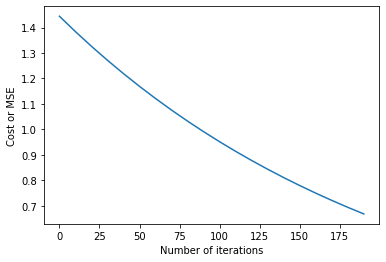

In [92]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

In [ ]:
## As we can see the cost function decreases with increase in iterations,
## but we still have not reached convergence.
## Now, let’s try with α=0.01 for 2000 iterations and compare it with α=0.001 
### and find which learning rate is better for this dataset.

Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

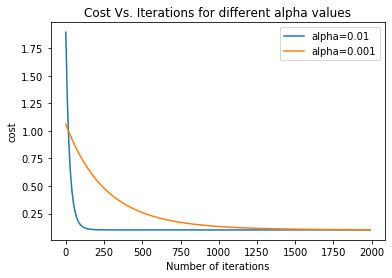

In [93]:
alpha_df_1,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000)
alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000)
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label="alpha=0.01")
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label="alpha=0.001")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')

In [ ]:
As one can see, 0.01 is the more optimal learning rate as it converges much quicker than 0.001. 0.01 converges around the 100 mark, while 0.001 takes 1000 iterations to reach convergence.

Hence, we have successfully built a gradient descent algorithm on python. Remember, the optimal value of learning rate will be different for each and every dataset.

Hope you learned something new and meaningful today.